Skrypt analizujący ilość pracowników na wydziale o określonym stopniu naukowym.

In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By

import matplotlib.pyplot as plt
import re

In [6]:
# otwarcie strony
driver = webdriver.Firefox()
driver.get("https://ms.polsl.pl/pracownicy.php")

In [9]:
# lista pracowników
employeeList = driver.find_element(By.ID, "content")

# poszczególne rekordy listy
rows = employeeList.find_elements(By.XPATH, ".//a[@class='light' and starts-with(@href, 'pracownik.php?kod=')]")
print("Ilość znalezionych rekordów: ", len(rows))

# zmienna na dane pracowników
employeeData = []

# słownik na stopnie naukowe
degrees = {
    "lic.": 0,
    "inż.": 0,
    "mgr inż.": 0,
    "mgr": 0,
    "dr hab. inż.": 0,
    "dr hab.": 0,
    "dr inż.": 0,
    "dr ": 0,
    "prof. dr hab. inż.": 0,
    "prof. dr hab.": 0,
    "prof. PŚ": 0,
}

# zmienna na potrzeby testów - ograniczająca liczbę scrapowanych rekordów
# i = 0

for row in rows:

    # zmienna pomocnicza
    # i += 1
    # if(i>5):
    #     break
    
    # wyciągnięcie imienia
    employeeDesc = row.find_element(By.CLASS_NAME, "pracownik")
    text = employeeDesc.find_element(By.TAG_NAME, "strong")
    text = text.get_attribute("innerHTML")
    fullName = text.split("<br>")[0]
    regex = r"dr |hab\.|inż\.|prof\.|mgr|lic\.|dziekan|prodziekan|PŚ|\,|<.*?>"
    name = re.sub(regex, "", fullName)
    name = name.strip()

    # wyciągnięcie stopnia naukowego
    pattern = r"(" + "|".join(map(re.escape, degrees.keys())) + r")"
    matches = re.findall(pattern, fullName)
    stopien = matches

    # zwiekszenie licznika w slowniku
    for match in matches:
        if match in degrees:
            degrees[match] += 1

    # dodanie do listy
    employeeData.append([name, stopien])
    print("fullName:", fullName, " name: ", name, " stopień:", stopien)

# wyswietlenie ilości stopni naukowych
# print(degrees)

Ilość znalezionych rekordów:  74
fullName: dr inż. Marcin Adam  name:  Marcin Adam  stopień: ['dr inż.']
fullName: dr Katarzyna Adrianowicz  name:  Katarzyna Adrianowicz  stopień: ['dr ']
fullName: prof. dr hab. Orest Artemovych  name:  Orest Artemovych  stopień: ['prof. dr hab.']
fullName: dr Lech Bartłomiejczyk  name:  Lech Bartłomiejczyk  stopień: ['dr ']
fullName: dr inż. Agnieszka Bier  name:  Agnieszka Bier  stopień: ['dr inż.']
fullName: dr Barbara Biły  name:  Barbara Biły  stopień: ['dr ']
fullName: dr inż. Marek Błasik  name:  Marek Błasik  stopień: ['dr inż.']
fullName: prof. dr hab. Mykola Bratiichuk  name:  Mykola Bratiichuk  stopień: ['prof. dr hab.']
fullName: dr inż. Rafał Brociek  name:  Rafał Brociek  stopień: ['dr inż.']
fullName: dr Giacomo Capizzi  name:  Giacomo Capizzi  stopień: ['dr ']
fullName: dr Robertas Damaševičius  name:  Robertas Damaševičius  stopień: ['dr ']
fullName: mgr inż. Ewelina Domalik  name:  Ewelina Domalik  stopień: ['mgr inż.']
fullName: prof

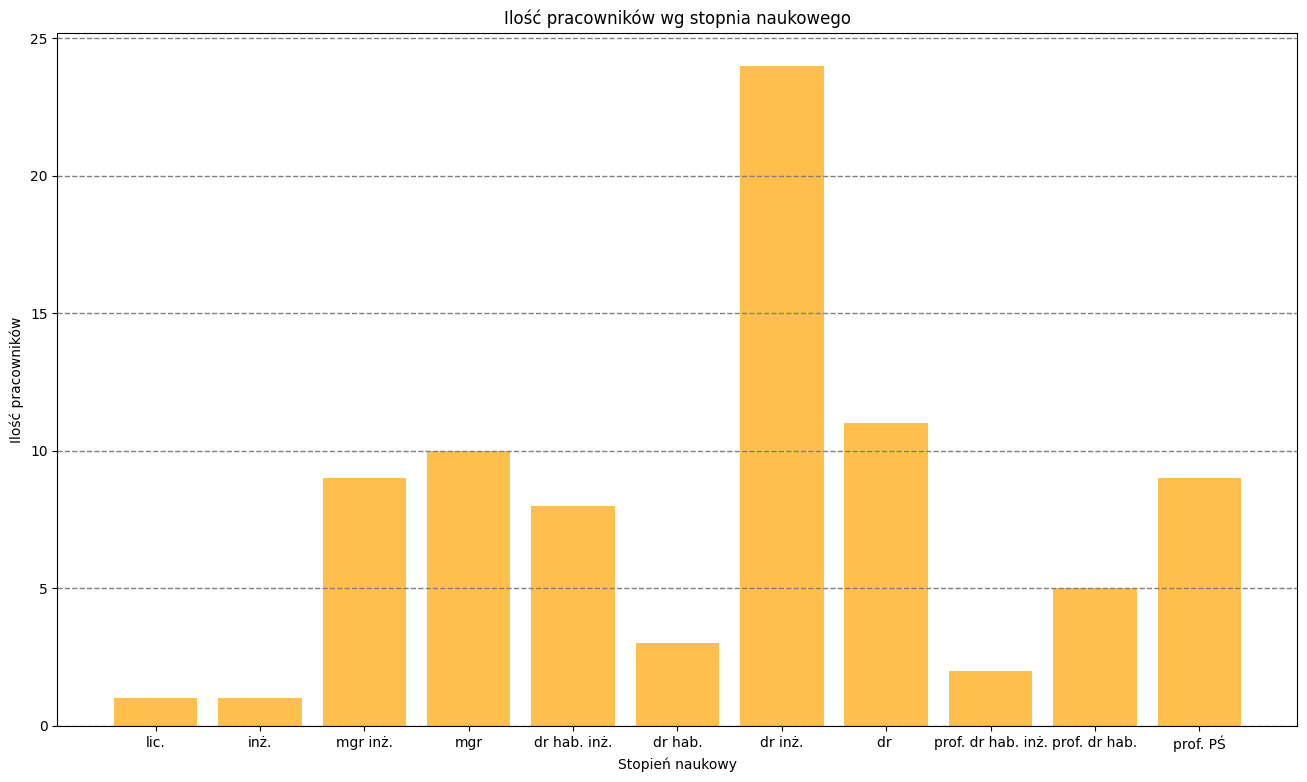

In [8]:
# wyciągnięcie stopni i ich ilości na potrzeby wykresu
stopnie = list(degrees.keys())
ilosci = list(degrees.values())

# wykres
plt.figure(figsize=(16, 9))
plt.bar(stopnie, ilosci, color='orange', alpha=0.7)
plt.xlabel('Stopień naukowy')
plt.ylabel('Ilość pracowników')
plt.title('Ilość pracowników wg stopnia naukowego')
plt.grid(True, axis='y', linestyle="--", color="gray", linewidth=1)

plt.show()
